# This is a project on analyzing the Time-Series data on the famous Berkeley dataset for Global Temperatures By Country

## Importing basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

## Data Preprocessing

SInce I know there is a datetime column present in the dataset and it's at 1st index, I'm going to mention it while reading the CSV itself.

In [2]:
df = pd.read_csv("GlobalLandTemperaturesByCountry.csv", delimiter = ',', parse_dates = True, index_col = 0)

No need of the Uncertainty column in our analysis, hence I will drop it.

In [3]:
df = df.drop('AverageTemperatureUncertainty', axis = 1)

In [4]:
df.head(7)

,AverageTemperature,Country
dt,,
1743-11-01,4.384,Åland
1743-12-01,NaN,Åland
1744-01-01,NaN,Åland
1744-02-01,NaN,Åland
1744-03-01,NaN,Åland
1744-04-01,1.530,Åland
1744-05-01,6.702,Åland


### Few Summary Statistics and Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 577462 entries, 1743-11-01 to 2013-09-01
Data columns (total 2 columns):
AverageTemperature    544811 non-null float64
Country               577462 non-null object
dtypes: float64(1), object(1)
memory usage: 13.2+ MB


In [6]:
# renaming the index for better understanding
df.rename_axis(index = 'Date', inplace = True)

In [7]:
df.head()

,AverageTemperature,Country
Date,,
1743-11-01,4.384,Åland
1743-12-01,NaN,Åland
1744-01-01,NaN,Åland
1744-02-01,NaN,Åland
1744-03-01,NaN,Åland


In [8]:
df_country = df.Country.unique()
len(df_country)

243

In [9]:
df_country

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecu

## Mapping average temperature by country

In [10]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [11]:
# Lets remove the duplicated countries and countries for which no information is present about the temperature

df_clear = df[~df['Country'].isin(
    ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])]

df_clear = df_clear.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

#Let's average temperature for each country

countries = np.unique(df_clear['Country'])
mean_temp = []
for country in countries:
    mean_temp.append(df_clear[df_clear['Country'] == 
                                               country]['AverageTemperature'].mean())


    
data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = mean_temp,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = '# Average\nTemperature,\n°C')
            )
       ]

layout = dict(
    title = 'Average land temperature in countries',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

### From the map, its evident that Greenland has the lowest average temperature and Mali may be the country with highest mean global temperature. 

# Performing the analysis on United States

In [12]:
usa = df[df['Country'] == 'United States']

In [13]:
usa.head()

,AverageTemperature,Country
Date,,
1768-09-01,15.420,United States
1768-10-01,8.162,United States
1768-11-01,1.591,United States
1768-12-01,-2.882,United States
1769-01-01,-3.952,United States


No need of the column 'Country' now, since we know it's 'United States'

In [14]:
usa = usa.drop('Country', axis = 1)

In [15]:
usa.head()

,AverageTemperature
Date,
1768-09-01,15.420
1768-10-01,8.162
1768-11-01,1.591
1768-12-01,-2.882
1769-01-01,-3.952


In [16]:
usa = usa.sort_index()
usa.head()

,AverageTemperature
Date,
1768-09-01,15.420
1768-10-01,8.162
1768-11-01,1.591
1768-12-01,-2.882
1769-01-01,-3.952


### I'm going to consider the temperature just from 1900 until the end of 2012 since it's enough for prediction as well as running the model in small amount of time.

In [17]:
usa = usa.loc['1900':'2013-01-01']
usa = usa.asfreq('M', method='ffill')
usa.head()

,AverageTemperature
Date,
1900-01-31,-2.573
1900-02-28,-2.912
1900-03-31,2.636
1900-04-30,8.091
1900-05-31,14.317


Checking for any null values. If present, use forward filling method to impute the missing values.

In [18]:
usa.isna().sum()

AverageTemperature    0
dtype: int64

# EDA and Plotting the original data

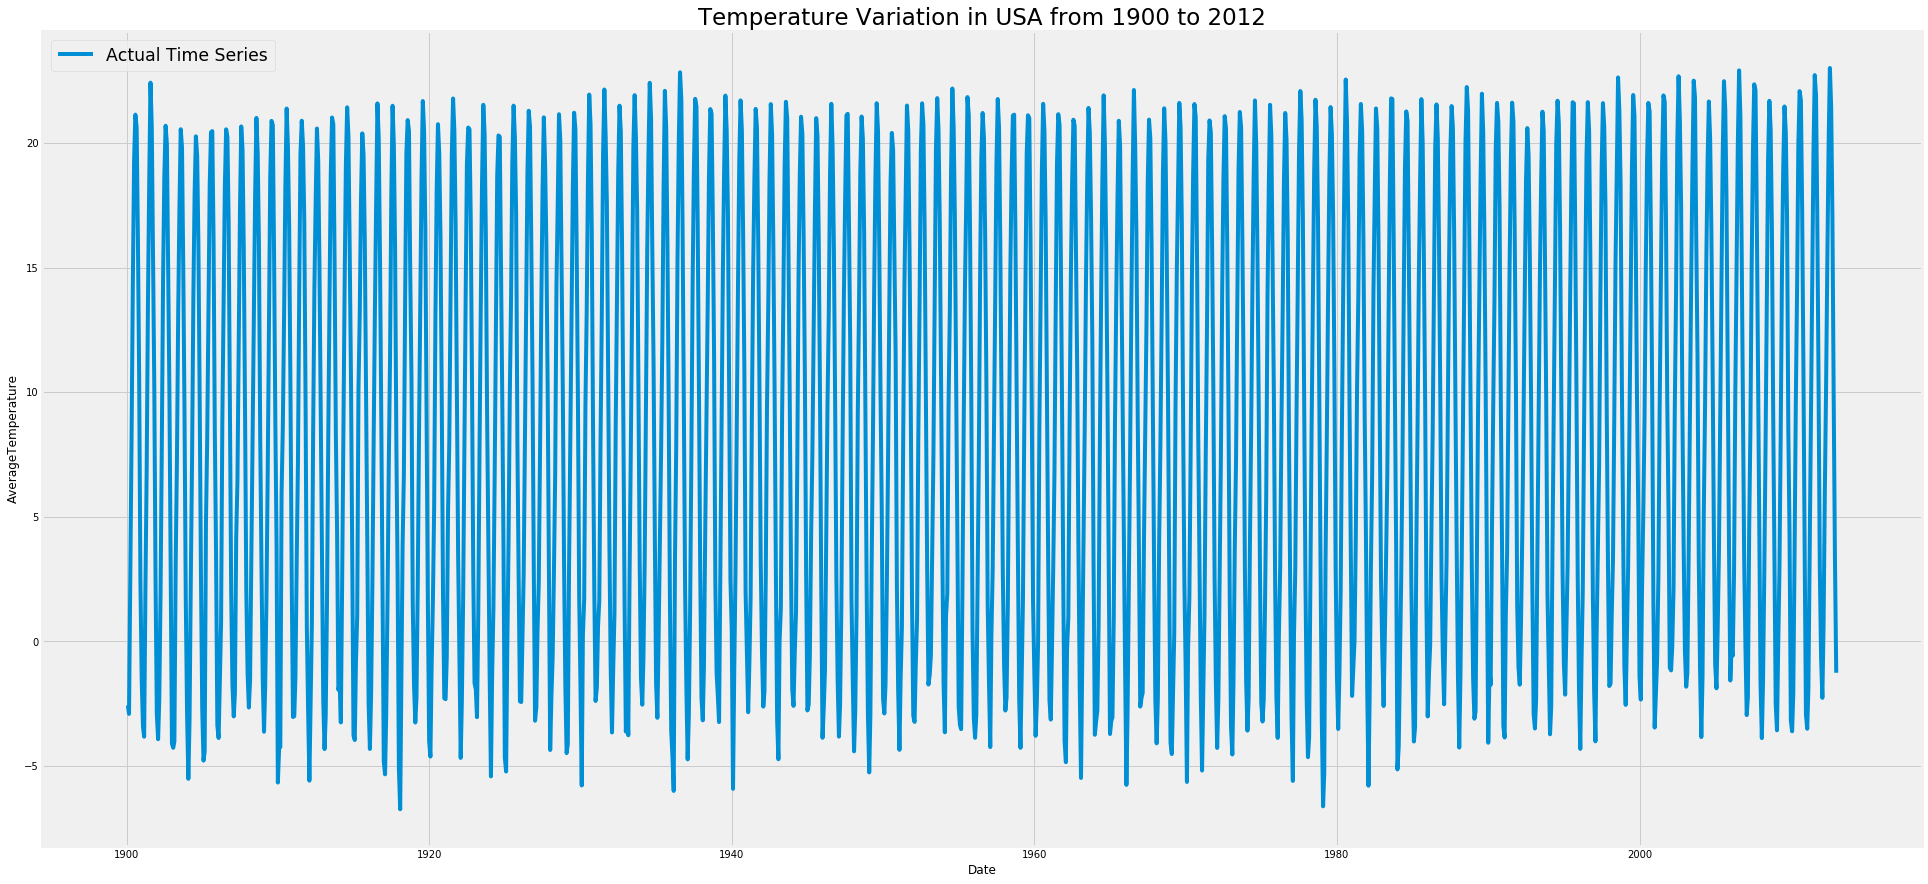

In [19]:
import seaborn as sns

fig = plt.subplots(figsize=(30, 15))
sns.lineplot(x=usa.index, y=usa['AverageTemperature'], label = 'Actual Time Series')
plt.title('Temperature Variation in USA from 1900 to 2012', size = 23)
plt.legend(fontsize='xx-large')
plt.show()

## Creating a pivot table to plot the monthly temperatures through the years

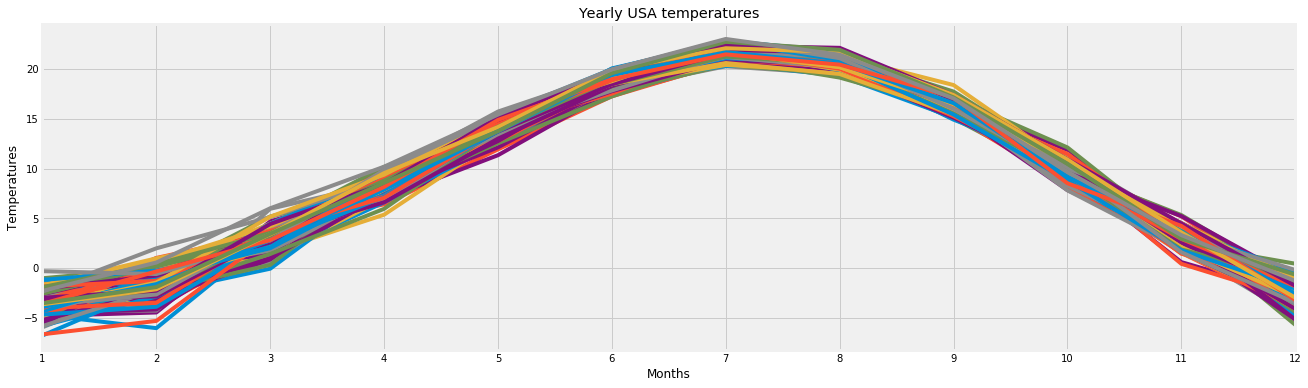

In [20]:
usa['month'] = usa.index.month
usa['year'] = usa.index.year
pivot = pd.pivot_table(usa, values='AverageTemperature', index='month', columns='year', aggfunc='mean')
pivot.plot(figsize=(20, 6))
plt.title('Yearly USA temperatures')
plt.xlabel('Months')
plt.ylabel('Temperatures')
plt.xticks([x for x in range(1, 13)])
plt.legend().remove()
plt.show()

### The series clearly has some seasonality, the higher temperatures are around June and August and the lower are between November and February. Just to make the things clear, I'll merge these lines into just one line, averaging the monthly levels:

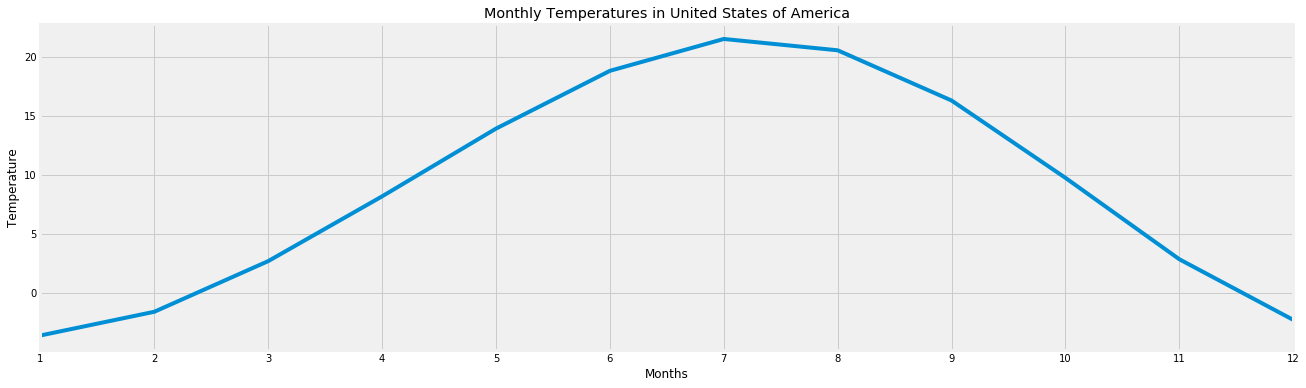

In [21]:
monthly_seasonality = pivot.mean(axis=1)
monthly_seasonality.plot(figsize=(20, 6))
plt.title('Monthly Temperatures in United States of America')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.xticks([x for x in range(1,13)])
plt.show()

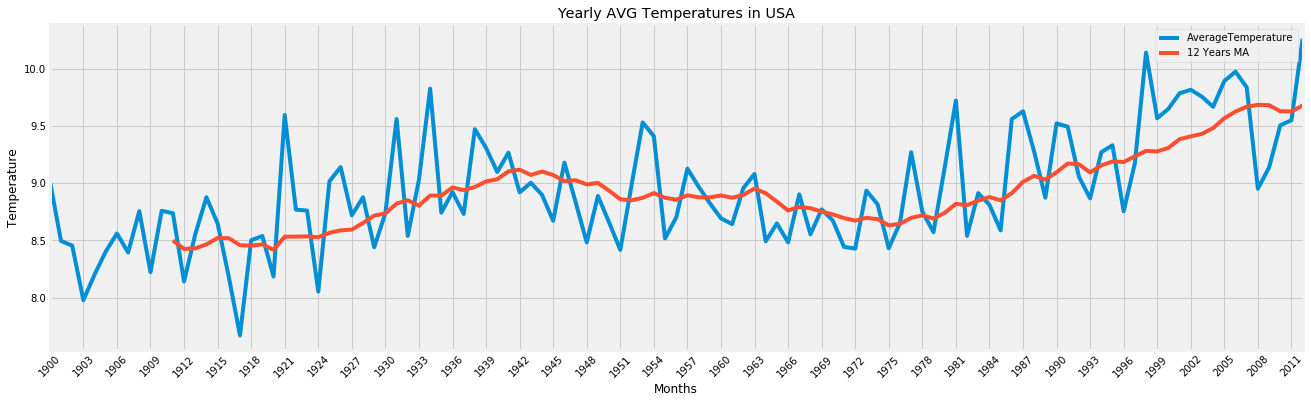

In [22]:
year_avg = pd.pivot_table(usa, values='AverageTemperature', index='year', aggfunc='mean')
year_avg['12 Years MA'] = year_avg['AverageTemperature'].rolling(12).mean()
year_avg[['AverageTemperature','12 Years MA']].plot(figsize=(20, 6))
plt.xticks(rotation=45)
plt.title('Yearly AVG Temperatures in USA')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.xticks([x for x in range(1900, 2013, 3)])
plt.show()

### We can confirm that there is a constant increasing trend and that the average temperature increased from 8.5º to 9.7º, that's 1.2% in over 100 years.

In [23]:
usa.drop(['month', 'year'], axis = 1, inplace=True)

In [24]:
usa.head()

,AverageTemperature
Date,
1900-01-31,-2.573
1900-02-28,-2.912
1900-03-31,2.636
1900-04-30,8.091
1900-05-31,14.317


### Decomposing the data

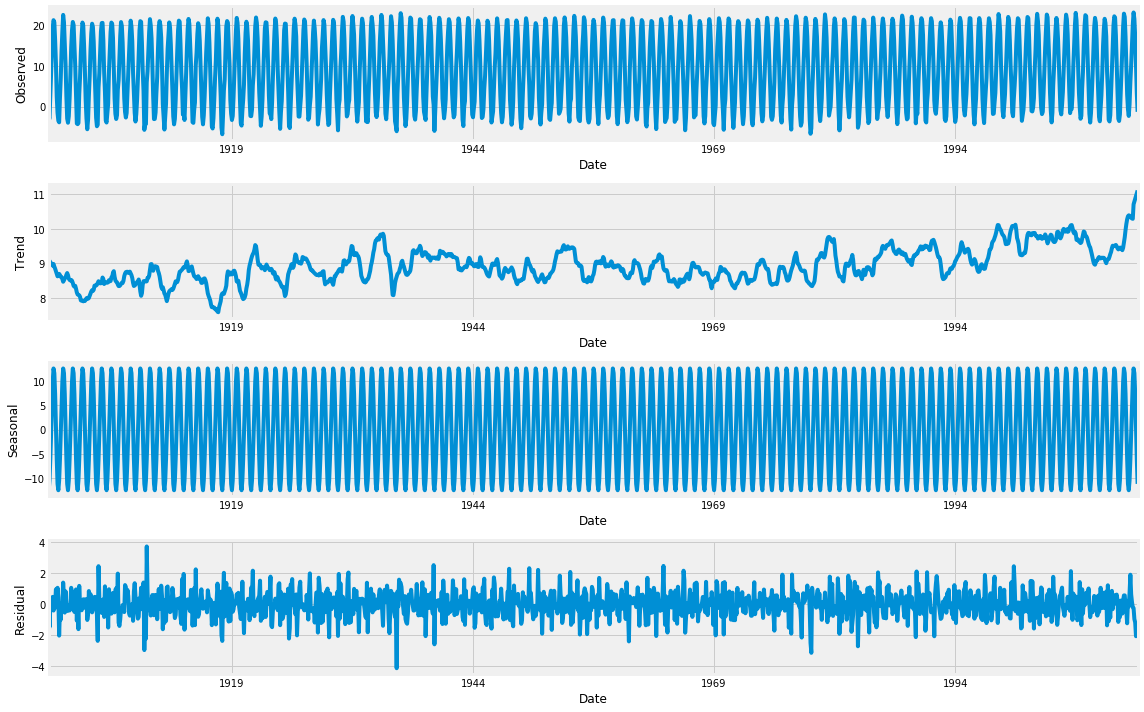

In [25]:
import statsmodels.api as sm

decompose = sm.tsa.seasonal_decompose(
    usa, model='additive', extrapolate_trend='freq')

# Plot
fig, axes = plt.subplots(nrows=4, figsize=(16, 10))

decompose.observed.plot(ax=axes[0], legend=False)
axes[0].set_ylabel('Observed')

decompose.trend.plot(ax=axes[1], legend=False)
axes[1].set_ylabel('Trend')

decompose.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Seasonal')

decompose.resid.plot(ax=axes[3], legend=False)
axes[3].set_ylabel('Residual')

plt.tight_layout()
plt.show()

## Stationarity Checking and Plotting rolling mean statistics

In [26]:
from statsmodels.tsa.stattools import adfuller

def stationarity_check(ts):
    
    # Determing rolling statistics
    roll_mean = ts.rolling(window=12).mean()
    
    # Plot rolling statistics:
    plt.figure(figsize=(20,5))
    plt.plot(ts, color='green',label='Original');
    plt.plot(roll_mean, color='blue', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False);
    
    # Perform Augmented Dickey-Fuller test:
    print('Augmented Dickey-Fuller test:')
    df_test = adfuller(ts)
    df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print("df_output: \n",df_output)
    for key,value in df_test[4].items():
        df_output['Critical Value (%s)'%key] = value
    print(df_output)

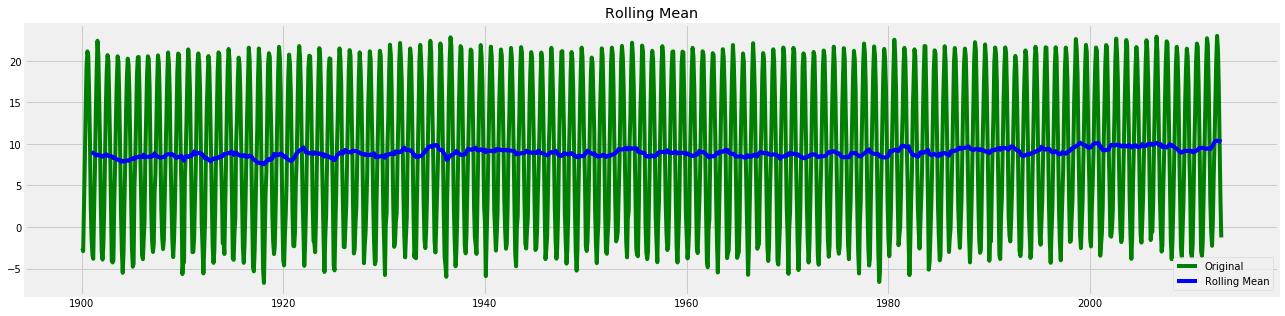

Augmented Dickey-Fuller test:
df_output: 
 Test Statistic                   -3.421967
p-value                           0.010232
#Lags Used                       24.000000
Number of Observations Used    1331.000000
dtype: float64
Test Statistic                   -3.421967
p-value                           0.010232
#Lags Used                       24.000000
Number of Observations Used    1331.000000
Critical Value (1%)              -3.435273
Critical Value (5%)              -2.863714
Critical Value (10%)             -2.567927
dtype: float64


In [27]:
stationarity_check(usa.AverageTemperature)

### The p-value is less than significant value(0.05) and t-statistic is also less than the 3 critical values. So, we say that the series is stationary. We do not need to perform any tasks to remove stationarity.

## Moving towards analysis and predictions

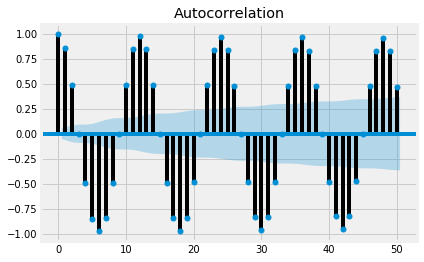

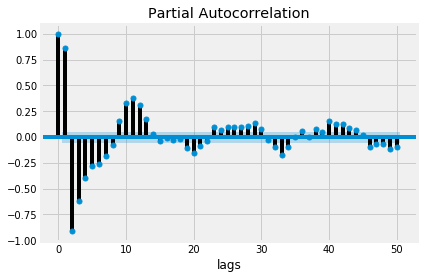

In [28]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

plot_acf(usa.AverageTemperature, lags=50)
plot_pacf(usa.AverageTemperature, lags=50)
plt.xlabel('lags')
plt.show()

From ACF and PACF plots, it's showing signs that the AR and MA parameters are in the range of 2 to 3. Also, our data has seasonality as observed in previous plot in Yearly Average plot and Seasonal Decompose plots.
Let's try running SARIMA analysis for varying range of AR and MA parameters.

### Choosing train data

In [29]:
train = usa.loc['1995':'2020']

### Examples for seasonality, trend, and noise combinations. Searching for paramaters
### https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html

In [30]:
# from statsmodels.tsa.arima_model import ARMA
# import warnings
# warnings.filterwarnings('ignore')
# import itertools

# p = d = q = range(1, 4)
# pdq = list(itertools.product(p, d, q))

# seasonal_pdq = [(x[0], x[1], x[2], 12)
#                 for x in list(itertools.product(p, d, q))]

# for param in pdq:
#     for param_seasonal in seasonal_pdq:
#         try:
#             mod = sm.tsa.statespace.SARIMAX(train,
#                                            order=param,
#                                            seasonal_order=param_seasonal,
#                                            enforce_stationarity=False,
#                                            enforce_invertibility=False)
#             results = mod.fit()
#             print('SARIMAX{} x {} - AIC:{}'.format(param,
#                                                 param_seasonal, results.aic))
#         except:
#             continue

The AIC being low for (2, 1, 3) x (1, 1, 3, 12) tell us that the perfect parameters are (AR, D, MA) = (2, 1, 3) and seasonal parameters are (P, D, Q, s) = (1, 1, 3, 12).

### Fitting the model

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0754      0.529      0.143      0.887      -0.962       1.113
ar.L2          0.3076      0.318      0.968      0.333      -0.315       0.930
ma.L1         -0.9277      0.532     -1.744      0.081      -1.970       0.115
ma.L2         -0.2909      0.745     -0.391      0.696      -1.751       1.169
ma.L3          0.2318      0.255      0.909      0.363      -0.268       0.731
ar.S.L12      -0.6150      0.103     -5.987      0.000      -0.816      -0.414
ma.S.L12      -0.3378      0.106     -3.201      0.001      -0.545      -0.131
ma.S.L24      -0.6821      0.092     -7.416      0.000      -0.862      -0.502
ma.S.L36       0.0590      0.027      2.217      0.027       0.007       0.111
sigma2         0.8171      0.028     29.524      0.000       0.763       0.871


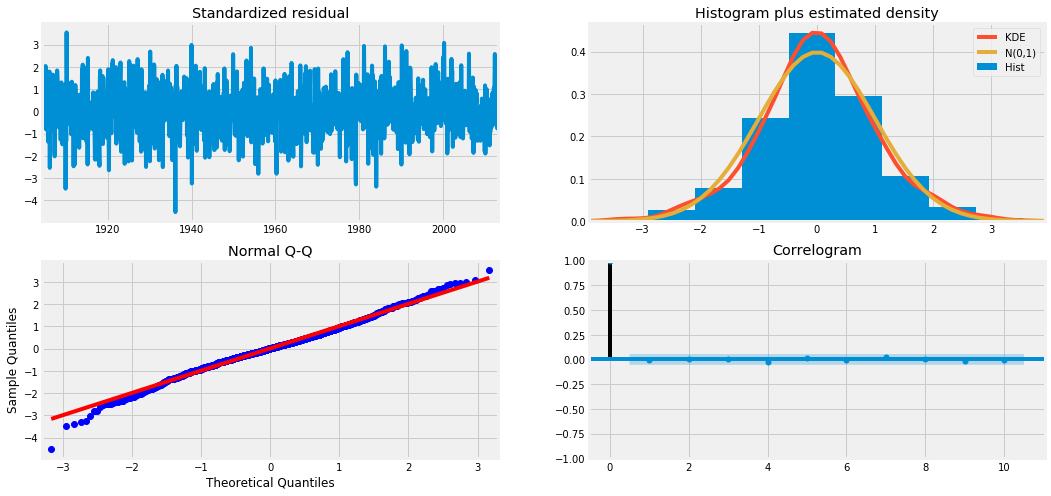

Fitting data MSE: 1.03


In [31]:
model = sm.tsa.statespace.SARIMAX(usa.AverageTemperature,
                                order=(2, 1, 3),
                                seasonal_order=(1, 1, 3, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = model.fit()
print(results.summary().tables[1])

# Investigating the results:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

print('Fitting data MSE: %.2f'% (((results.fittedvalues - usa.AverageTemperature)**2).mean()))

### Validating forecasts

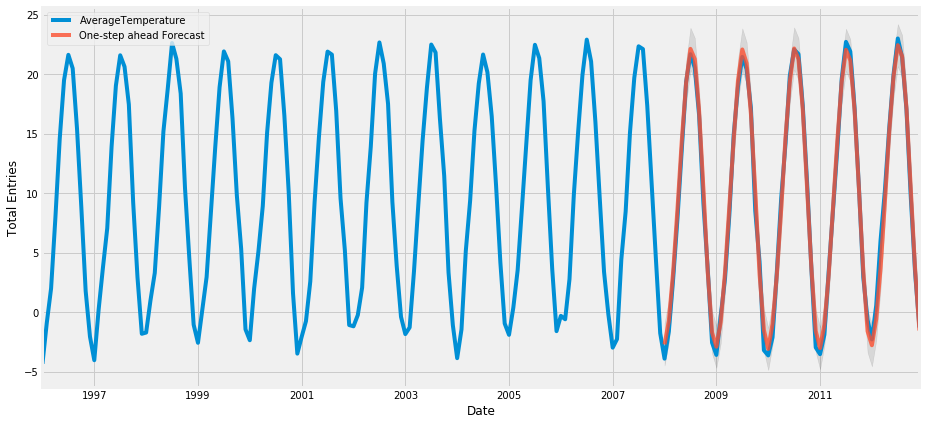

In [32]:
pred = results.get_prediction(
    start=pd.to_datetime('2008-01-31').date(), dynamic=False)

pred_ci = pred.conf_int()

ax = usa['1996':].plot(label='observed')

pred.predicted_mean.plot(
    ax=ax, label='One-step ahead Forecast', alpha=.8, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.1)

ax.set_xlabel('Date')
ax.set_ylabel('Total Entries')

plt.legend()
plt.show()

The graph as well as the MSE value above shows that the model is trained nicely and predictions are pretty good.

## Lets Forecast values for the next 60 months i.e. from 2013 to 2018!

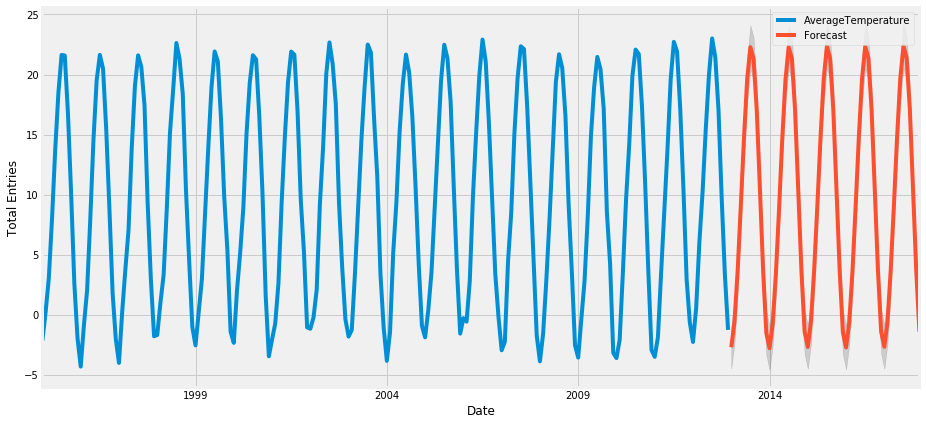

In [33]:
pred_uc = results.get_forecast(steps=60)
pred_ci = pred_uc.conf_int()

ax = train.plot(label='Total Entries', figsize=(14, 7))

pred_uc.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.15)

ax.set_xlabel('Date')
ax.set_ylabel('Total Entries')

plt.legend()
plt.show()

# FIN!